In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [4]:
path = "drive/MyDrive/Colab Notebooks/Assignments/datasets/"

In [5]:
df = pd.read_csv(path+"haberman.csv",names=['age', 'op_year', 'nodes', 'survival'])
df.head(5)

,age,op_year,nodes,survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


# Dataset Information
Number of points, numer of features, number of classes, data-points per class.
- **Objective** : Classifiy if patient survives 5 years or longer after operation 
- **No of Features** : 4
- **No of Classes** : 2
- **Fields**

| Feature_Name      | Description |
| ----------- | ----------- |
| age      | age of patient at the time of operation       |
| op_year   | Year in which the patient underwent opeation        |
| nodes   | Number of positive axillary nodes or lymph nodes which are use to detect cancer        |
| survival   |  1 : &nbsp;Patient survived 5 years or longer<br>2 :&nbsp;Patient died within 5 years        |





In [6]:
print("Data shape: ",df.shape)
print("Checking for null values")
print(df.isnull().sum())

Data shape:  (306, 4)
Checking for null values
age         0
op_year     0
nodes       0
survival    0
dtype: int64


In [7]:
print(df.describe())

              age     op_year       nodes    survival
count  306.000000  306.000000  306.000000  306.000000
mean    52.457516   62.852941    4.026144    1.264706
std     10.803452    3.249405    7.189654    0.441899
min     30.000000   58.000000    0.000000    1.000000
25%     44.000000   60.000000    0.000000    1.000000
50%     52.000000   63.000000    1.000000    1.000000
75%     60.750000   65.750000    4.000000    2.000000
max     83.000000   69.000000   52.000000    2.000000


In [8]:
counts = df.iloc[:]["survival"].value_counts()
print("Survival Distribution \n ",counts)
survive_yes =  counts[1]/sum(counts)
survive_no =  counts[2]/sum(counts)
print()
print("Survived = yes  : ",survive_yes,)
print("Survived = no  : ",survive_no,)

Survival Distribution 
  1    225
2     81
Name: survival, dtype: int64

Survived = yes  :  0.7352941176470589
Survived = no  :  0.2647058823529412


## Observation about the data set
- There are 306 data rows with 4 features
- There are no null values
- The datasets is imbalanced as 73.52% of data points belong to survival = 1 and only 26.47% for survival=2



# Univariate Analysis

In [9]:
p_color = ["green","red"]

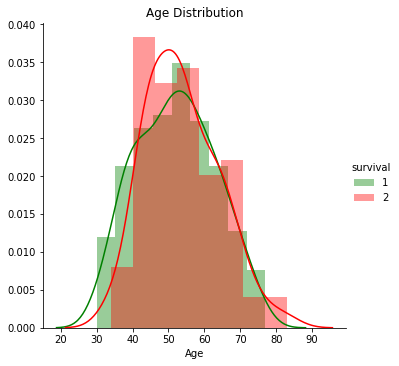

In [10]:
# plt.subplots(1, 2)
sns.FacetGrid(df, hue="survival", size=5, palette=p_color) \
   .map(sns.distplot, "age") \
   .add_legend() \
   .set(xlabel='Age', title="Age Distribution");
plt.show();



- In the above plot for age, as overlap is significant we cant come to any resolute inferences
- We can find that people below age of 40 have high chance of survival
- People between age 45-60 have slighly high chances of not surviving  

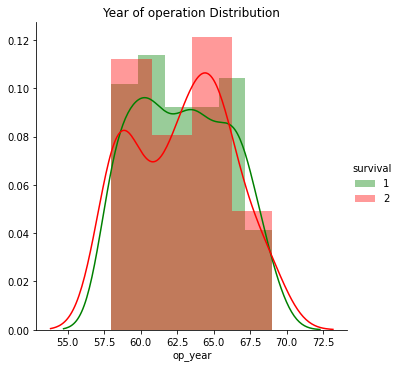

In [11]:
sns.FacetGrid(df, hue="survival", size=5, palette=p_color) \
   .map(sns.distplot, "op_year") \
   .add_legend() \
   .set(xlabel='op_year', title="Year of operation Distribution");
plt.show();


- In the above plot for op_year, as overlap is significant we cant come to any resolute inferences
- we can approximate that people who got operated between 1960-1965 had higher chances of not surviving

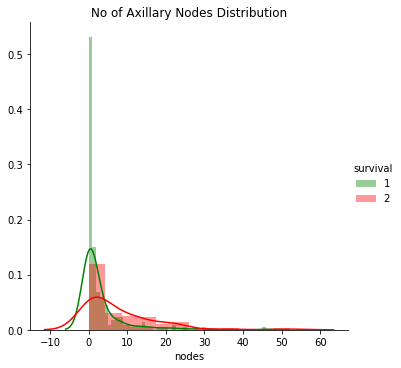

In [12]:
sns.FacetGrid(df, hue="survival", size=5, palette=p_color) \
   .map(sns.distplot, "nodes") \
   .add_legend() \
   .set(xlabel='nodes', title="No of Axillary Nodes Distribution");
plt.show();


- Most of the people who survived have 0 or 1axillary nodes 
- As axillary nodes no starts increasing the chances of survival decrease
- if no of axilary nodes >25 then chances of survival are very slim

## PDF and CDF's

In [13]:
df_survivors = df[df["survival"]==1]

In [14]:
def plot_pdf_cdf(data,col_name,title):
  counts, bin_edges = np.histogram(data[col_name], bins=10, density = True)
  pdf = counts/(sum(counts))

  #compute CDF
  cdf = np.cumsum(pdf)
  plt.plot(bin_edges[1:],pdf,label="pdf")
  plt.plot(bin_edges[1:], cdf,label="cdf")
  plt.title(title)
  plt.xlabel(col_name)
  plt.legend(loc="upper right")
  plt.show();

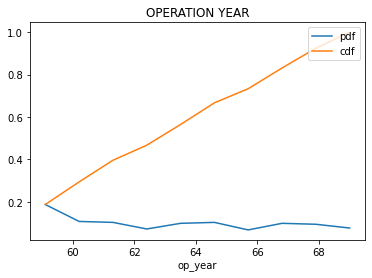

In [15]:
plot_pdf_cdf(df_survivors,"op_year","OPERATION YEAR")

- About 80% people who had an operation before 1966 survived

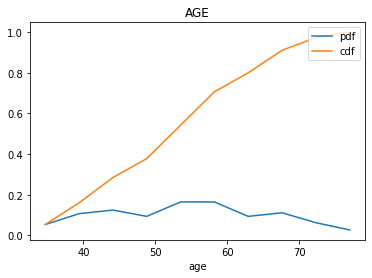

In [16]:
plot_pdf_cdf(df_survivors,"age","AGE")

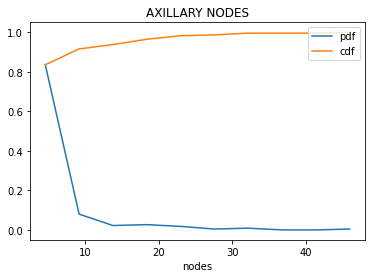

In [17]:

plot_pdf_cdf(df_survivors,"nodes","AXILLARY NODES")

- 82% of people who survived had axillary nodes <2


### Box and Violin Plots

In [18]:
#https://stackoverflow.com/questions/41384040/subplot-for-seaborn-boxplot
# used this reference for plotting multiple plots next to each other

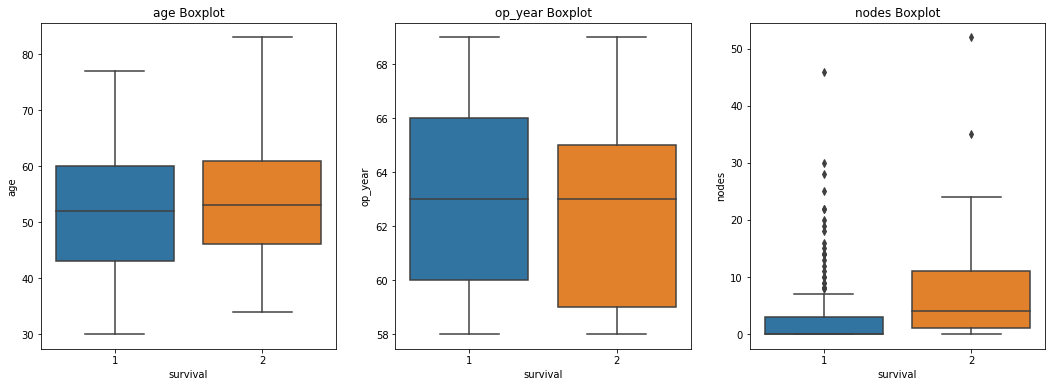

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for idx, feature in enumerate(list(df.columns)[:-1]):
    sns.boxplot( x='survival', y=feature, data=df, ax=axes[idx]).set_title(feature+" Boxplot")
plt.show() 

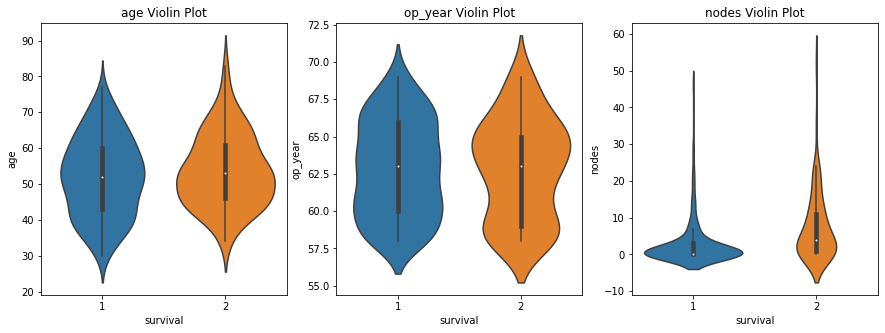

In [20]:

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, feature in enumerate(list(df.columns)[:-1]):
    sns.violinplot( x='survival', y=feature, data=df, ax=axes[idx]).set_title(feature+" Violin Plot")

- Most patients who survived had 0 or 1 nodes. As no of nodes increases the chance of survival reduces drastically. The plots for nodes vs survival clearly indicate that as nodes increases the survival rate goes on decreasing. Hence it can be intrepreted as a prominent feature
- From boxplot of nodes vs Survival we can say that most people had nodes < 25. Very few people hax axillary nodes > 25
- From violin plot of op_year vs survival, we find that people who got operated in the year nearing 1965 (1963-1965) did not survive for more than 5 years.
- The violin and box plots for age and op_year seem to be fairly similar and there is significant overlap.


## Percentiles, Mean, SD

### Survived

In [21]:
print(df[df["survival"] == 1].describe())

              age     op_year       nodes  survival
count  225.000000  225.000000  225.000000     225.0
mean    52.017778   62.862222    2.791111       1.0
std     11.012154    3.222915    5.870318       0.0
min     30.000000   58.000000    0.000000       1.0
25%     43.000000   60.000000    0.000000       1.0
50%     52.000000   63.000000    0.000000       1.0
75%     60.000000   66.000000    3.000000       1.0
max     77.000000   69.000000   46.000000       1.0


### Not Survived

In [22]:
print(df[df["survival"] == 2].describe())

             age    op_year      nodes  survival
count  81.000000  81.000000  81.000000      81.0
mean   53.679012  62.827160   7.456790       2.0
std    10.167137   3.342118   9.185654       0.0
min    34.000000  58.000000   0.000000       2.0
25%    46.000000  59.000000   1.000000       2.0
50%    53.000000  63.000000   4.000000       2.0
75%    61.000000  65.000000  11.000000       2.0
max    83.000000  69.000000  52.000000       2.0


### Observations
- The mean age and op_year in both cases is similar. 
- The mean of nodes for survival is 5.8 whereas mean of nodes for patient not surviving is 7.45. So we can interpret that nodes is an important feature
- In case of survival 50% people have 0 auxillary nodes and in case of deaths 25% people have 0 aucillary nodes.<b> Hence, if there are 0 axillary nodes we cant be 100% sure that the patient will survive </b>

# Bi-Variate Analysis

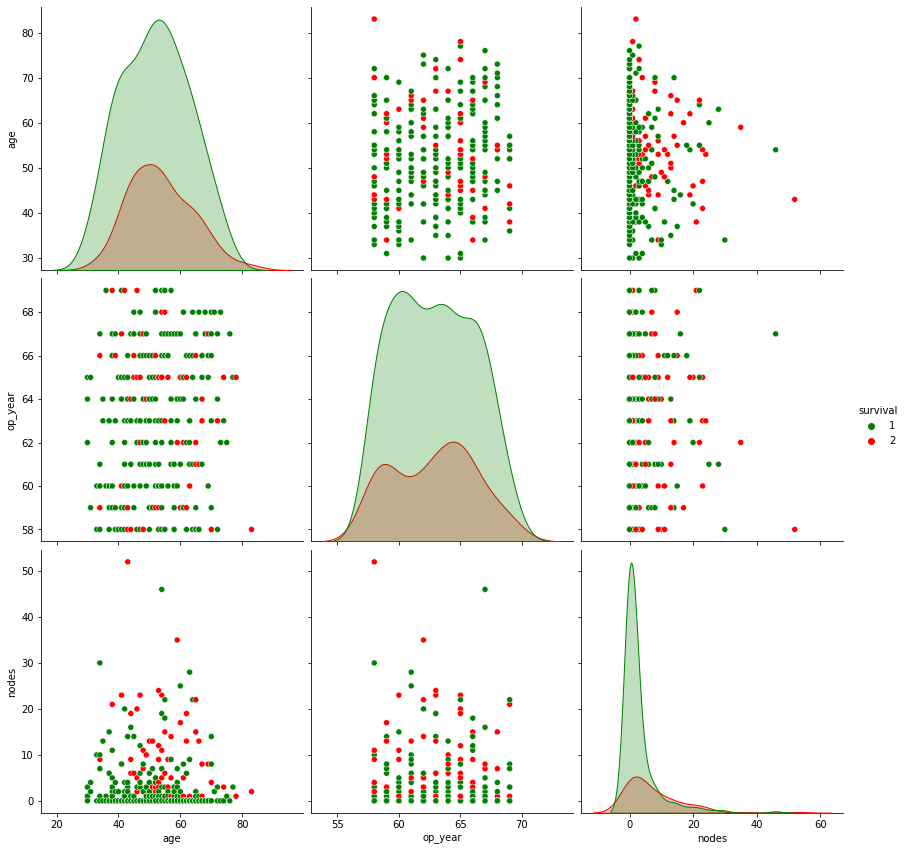

In [23]:
sns.pairplot(df, hue='survival', size=4, palette = p_color)
plt.show()

From the above pair-plots,
We can say that the plot of age vs nodes is most useful compared to the other plots

## Scatter Plot

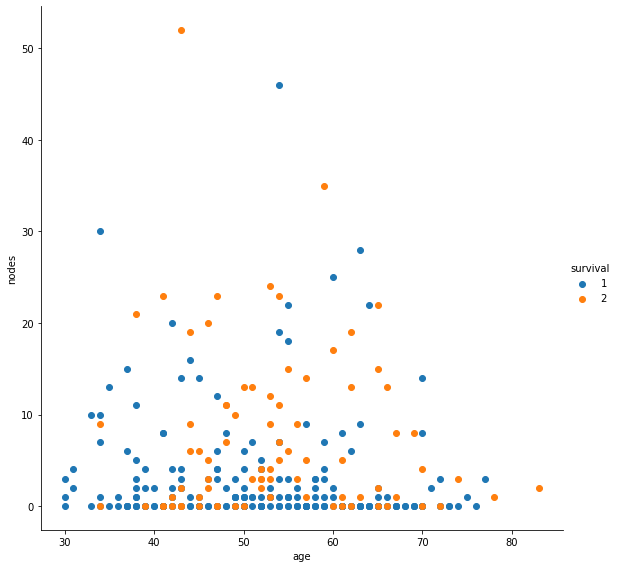

In [24]:
# sns.set_style(“whitegrid”)
sns.FacetGrid(df,hue="survival",size=8).map(plt.scatter,"age","nodes").add_legend()
plt.show()

- Most patients have nodes < 10
- Very few have nodes > 25
- Only one patient had age > 80 and he did not survive
- Patients below age of 40 had higher chance of survival. (only 4 patients did not survive)
- for patients with age between 40-70 we cant make any statements

## Multivariate

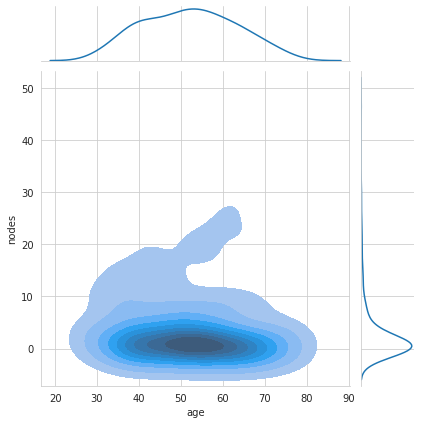

In [25]:
#2D Density plot, contors-plot
sns.set_style('whitegrid')
sns.jointplot(x="age", y="nodes",data=df[df["survival"]==1],kind="kde", shade=True);
plt.show();

### Density plot of age vs op_year for patients who survived
We found these 2 pairs most useful from analysis of all possible Pair Plots
- Majority of patients who survived had less than 2 or 3 axillary nodes and most people with 0 axillary nodes survived

<hr><hr>

# CONCLUSION
<hr>
<hr>
- Objective : Classifiy if patient survives 5 years or longer after operation

- There are no null values in the dataset

- The dataset is imbalanced as 73.52% of data points are of patients who survived and only 26.47% of data points are of patients who didnt survive

- We can find that people below the age of 40 had higher chance of survival. (only 4 patients below age of 40 did not survive)

- People who got operated between 1960-1965 had higher chances of not surviving

- Most of the people who survived have 0 or 1 axillary nodes.
 - 82% of people who survived had axillary nodes <2
 - if no of axilary nodes >25 then chances of survival are very low

- In case of survival 50% people have 0 auxillary nodes and in case of deaths 25% people have 0 auxillary nodes. 
 - <b>Hence, if there are 0 axillary nodes we cant be 100% sure that the patient will survive</b>



In [26]:
!jupyter nbconvert --to html "/content/EDA_Haberman (1).ipynb"

[NbConvertApp] Converting notebook /content/EDA_Haberman (1).ipynb to html
[NbConvertApp] Writing 750320 bytes to /content/EDA_Haberman (1).html
